In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
health_final = pd.read_csv('..\data\health_final.csv')

In [3]:
locations = pd.read_csv('..\data\location_region_division.csv')

In [4]:
locations=locations.rename(columns = {'region_x':'state', 
                                     'name_x':'brewery'})

In [5]:
health_final=health_final.rename(columns = {'5-digit_fips_code':'fips_code'})

In [6]:
crosswalk = pd.read_csv('..\\data\\uscities.csv', 
                       usecols= ['city', 'state_id', 'state_name', 'county_fips', 'county_name'])

In [7]:
us_country = gpd.read_file('../data/gz_2010_us_040_00_5m.json')

In [8]:
region_division = pd.read_csv('..\data\\region_division.csv',
                             usecols=['REGION','DIVISION', 'NAME'])

In [9]:
crosswalk.columns = crosswalk.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [10]:
# # merge both df so region and division are added
# location_final = pd.merge(locations, region_division, left_on='region', right_on='name')

In [11]:
# geo_locations = gpd.GeoDataFrame(
#     locations, geometry=gpd.points_from_xy(locations.longitude, locations.latitude))

In [12]:
region_map = {
    '1': 'Northeast',
    '2': 'Midwest',
    '3': 'South',
    '4': 'West',
    'X': 'Undefined'
}

In [13]:
division_map = {
    '1': 'New England',
    '2': 'Middle Atlantic',
    '3': 'East North Central',
    '4': 'West North Central',
    '5': 'South Atlantic',
    '6': 'East South Central',
    '7': 'West South Central',
    '8': 'Mountain',
    '9': 'Pacific',
    'X': 'Undefined'
}

In [14]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'US': 'United States',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [15]:
# Add word county to make it possible to merge names 
crosswalk['county_name'] = crosswalk['county_name'].astype(str) + ' County'

In [16]:
crosswalk.head()

,city,state_id,state_name,county_fips,county_name
0,South Creek,WA,Washington,53053,Pierce County
1,Roslyn,WA,Washington,53037,Kittitas County
2,Sprague,WA,Washington,53043,Lincoln County
3,Gig Harbor,WA,Washington,53053,Pierce County
4,Lake Cassidy,WA,Washington,53061,Snohomish County


In [17]:
crosswalk[(crosswalk.city == 'Greenland') & (crosswalk.state_name == 'Michigan')]

,city,state_id,state_name,county_fips,county_name


In [18]:
crosswalk.head(3)

,city,state_id,state_name,county_fips,county_name
0,South Creek,WA,Washington,53053,Pierce County
1,Roslyn,WA,Washington,53037,Kittitas County
2,Sprague,WA,Washington,53043,Lincoln County


In [19]:
# This merge results in a 10% loss of data
loc_cross = pd.merge(locations, crosswalk, left_on=['locality', 'state'], right_on=['city', 'state_name'], how='inner')

In [20]:
loc_cross.head(3)

,id,brewery,streetAddress,locality,state,postalCode,latitude,longitude,locationTypeDisplay,countryIsoCode,brewery.isMassOwned,us_region,us_division,geometry,city,state_id,state_name,county_fips,county_name
0,udRaBO,(Closed) Boulder Beer on Walnut,1123 Walnut St,Boulder,Colorado,80302,40.016871,-105.280436,Brewpub,US,N,West,Mountain,POINT (-105.2804358 40.0168706),Boulder,CO,Colorado,8013,Boulder County
1,pvSIT8,Adamant Brewing Company,1001 Lee Hill Drive,Boulder,Colorado,80302,40.062969,-105.284195,Micro Brewery,US,N,West,Mountain,POINT (-105.2841948 40.06296879999999),Boulder,CO,Colorado,8013,Boulder County
2,SXn3sZ,Avery Brewing Co.,4910 Nautilus Court North,Boulder,Colorado,80301,40.062531,-105.204787,Micro Brewery,US,N,West,Mountain,POINT (-105.2047868 40.0625314),Boulder,CO,Colorado,8013,Boulder County


In [21]:
# There are some nan values in the county_fips column
# loc_cross['county_fips'] = loc_cross['county_fips'].replace('nan', '')

In [22]:
# There are some nan values in the county_fips column
# loc_cross['county_fips'] = loc_cross['county_fips'].fillna(0)

In [23]:
# loc_cross[loc_cross.county_fips == 0].head(25)

In [24]:
loc_cross.county_fips = loc_cross.county_fips.astype(str)

In [25]:
loc_cross.county_fips = loc_cross.county_fips[:-2]

In [26]:
loc_cross.head()

,id,brewery,streetAddress,locality,state,postalCode,latitude,longitude,locationTypeDisplay,countryIsoCode,brewery.isMassOwned,us_region,us_division,geometry,city,state_id,state_name,county_fips,county_name
0,udRaBO,(Closed) Boulder Beer on Walnut,1123 Walnut St,Boulder,Colorado,80302,40.016871,-105.280436,Brewpub,US,N,West,Mountain,POINT (-105.2804358 40.0168706),Boulder,CO,Colorado,8013,Boulder County
1,pvSIT8,Adamant Brewing Company,1001 Lee Hill Drive,Boulder,Colorado,80302,40.062969,-105.284195,Micro Brewery,US,N,West,Mountain,POINT (-105.2841948 40.06296879999999),Boulder,CO,Colorado,8013,Boulder County
2,SXn3sZ,Avery Brewing Co.,4910 Nautilus Court North,Boulder,Colorado,80301,40.062531,-105.204787,Micro Brewery,US,N,West,Mountain,POINT (-105.2047868 40.0625314),Boulder,CO,Colorado,8013,Boulder County
3,A1BCFu,BJ's Restaurant and Brewhouse,1690 28th St,Boulder,Colorado,80301,40.017753,-105.257814,Brewpub,US,N,West,Mountain,POINT (-105.2578141 40.0177527),Boulder,CO,Colorado,8013,Boulder County
4,ZqnBtw,Boco Cider,1501 Lee Hill Dr.,Boulder,Colorado,80304,40.062625,-105.278768,Cidery,US,N,West,Mountain,POINT (-105.2787675 40.06262460000001),Boulder,CO,Colorado,8013,Boulder County


In [27]:
loc_cross.us_region.value_counts()

West         2306
South        1653
Midwest      1618
Northeast     885
Name: us_region, dtype: int64

In [28]:
loc_cross.us_division.value_counts()

Pacific               1472
East North Central    1164
South Atlantic        1070
Mountain               834
Middle Atlantic        684
West North Central     454
West South Central     386
New England            201
East South Central     197
Name: us_division, dtype: int64

In [29]:
# DF showing no matches. Using this to show loss of data
loc_nan = pd.merge(locations, crosswalk, left_on=['locality', 'state'], right_on=['city', 'state_name'], how='left')

In [30]:
loc_nan.us_region.value_counts()

West         2396
South        1764
Midwest      1719
Northeast    1320
Name: us_region, dtype: int64

In [31]:
loc_nan.us_division.value_counts()

Pacific               1541
East North Central    1213
South Atlantic        1158
Mountain               855
Middle Atlantic        842
West North Central     506
New England            478
West South Central     403
East South Central     203
Name: us_division, dtype: int64

In [32]:
loc_cross.head(2)

,id,brewery,streetAddress,locality,state,postalCode,latitude,longitude,locationTypeDisplay,countryIsoCode,brewery.isMassOwned,us_region,us_division,geometry,city,state_id,state_name,county_fips,county_name
0,udRaBO,(Closed) Boulder Beer on Walnut,1123 Walnut St,Boulder,Colorado,80302,40.016871,-105.280436,Brewpub,US,N,West,Mountain,POINT (-105.2804358 40.0168706),Boulder,CO,Colorado,8013,Boulder County
1,pvSIT8,Adamant Brewing Company,1001 Lee Hill Drive,Boulder,Colorado,80302,40.062969,-105.284195,Micro Brewery,US,N,West,Mountain,POINT (-105.2841948 40.06296879999999),Boulder,CO,Colorado,8013,Boulder County


In [33]:
loc_cross.shape

(6462, 19)

In [34]:
health_final.head(2)

,state_fips_code,county_fips_code,fips_code,state_abbreviation,county,excessive_drinking_raw_value,alcohol-impaired_driving_deaths_raw_value,income_inequality_raw_value,violent_crime_raw_value,life_expectancy_raw_value,drug_overdose_deaths_raw_value,insufficient_sleep_raw_value,median_household_income_raw_value,suicides_raw_value,population_raw_value,state,region,division
0,0,0,0,US,United States,0.189771,0.277641,4.920018,386.464896,79.089130,20.618144,0.33895,61937.0,13.580564,327167434,United States,NaN,NaN
1,1,0,1000,AL,Alabama,0.139035,0.275892,5.261136,479.919182,75.416194,16.176762,0.37721,49881.0,15.638260,4887871,Alabama,South,East South Central


In [35]:
health_final['fips_code'] = health_final['fips_code'].astype(str)

In [36]:
final_df = pd.merge(loc_cross, health_final, left_on='county_fips', right_on='fips_code', how='left')

In [37]:
final_df.shape

(6462, 37)

In [38]:
final_df = final_df.drop(columns='geometry', axis=1)

In [39]:
geo_final = gpd.GeoDataFrame(
    final_df, geometry=gpd.points_from_xy(final_df.longitude, final_df.latitude))

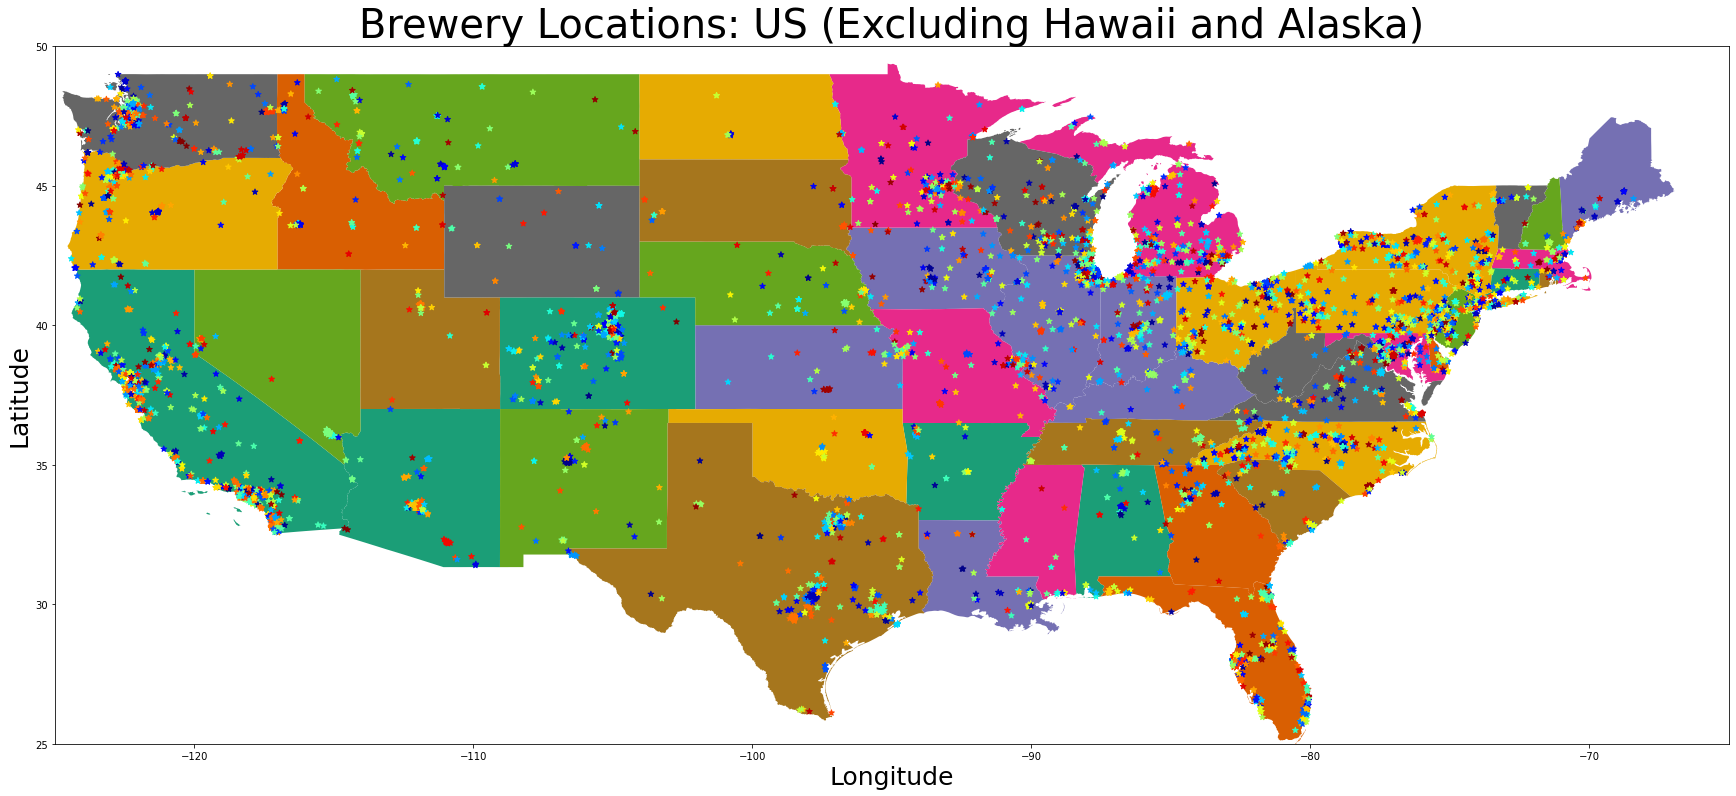

In [43]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = us_country.plot(ax=ax, column = 'STATE', cmap='Dark2')
plt.xlim(-125, -65)
plt.ylim(25, 50)
plt.title('Brewery Locations: US (Excluding Hawaii and Alaska)', loc='center', fontsize=40)
plt.xlabel('Longitude', fontsize = 25)
plt.ylabel('Latitude', fontsize = 25)
# plotting locations over states
geo_final.plot(ax=base, column=final_df.locality, marker="*", legend=False, cmap='jet')


In [63]:
# Find number of losses after the merge
loc_cross.us_division.value_counts().sub(loc_nan.us_division.value_counts(), fill_value=0).sort_values()

New England          -277
Middle Atlantic      -158
South Atlantic        -88
Pacific               -69
West North Central    -52
East North Central    -49
Mountain              -21
West South Central    -17
East South Central     -6
Name: us_division, dtype: int64

In [60]:
# Percentage lost in us divisions after merge
(((loc_cross.us_division.value_counts().sub(loc_nan.us_division.value_counts(), fill_value=0))/loc_cross.us_division.value_counts())*100).sort_values()

New England          -137.810945
Middle Atlantic       -23.099415
West North Central    -11.453744
South Atlantic         -8.224299
Pacific                -4.687500
West South Central     -4.404145
East North Central     -4.209622
East South Central     -3.045685
Mountain               -2.517986
Name: us_division, dtype: float64

In [61]:
# Find number of region losses after the merge
loc_cross.us_region.value_counts().sub(loc_nan.us_region.value_counts(), fill_value=0).sort_values()


Northeast   -435
South       -111
Midwest     -101
West         -90
Name: us_region, dtype: int64

In [59]:
# Different method using sub
# loc_cross.us_region.value_counts().sub(loc_nan.us_region.value_counts(), fill_value=0)/loc_cross.us_region.value_counts()*100


In [62]:
# Percentage lost in us regions after merge
(((loc_cross.us_region.value_counts() - loc_nan.us_region.value_counts())/loc_cross.us_region.value_counts())*100).sort_values()


Northeast   -49.152542
South        -6.715064
Midwest      -6.242274
West         -3.902862
Name: us_region, dtype: float64